In [14]:
# !pip install us

In [1]:
import geopandas as gp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import us
plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
contiguous = [s.name for s in us.states.STATES_CONTIGUOUS]

In [3]:
us_map = gp.read_file('US_shapefiles/tl_2021_us_state.shp')

In [4]:
us_map.columns

Index(['REGION', 'DIVISION', 'STATEFP', 'STATENS', 'GEOID', 'STUSPS', 'NAME',
       'LSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'geometry'],
      dtype='object')

In [5]:
us_contig = us_map[us_map.NAME.isin(contiguous)]

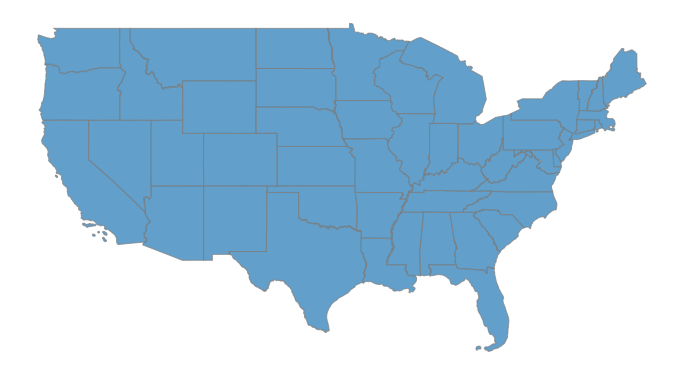

In [6]:
ax = us_contig.plot(edgecolor='grey', color='tab:blue', alpha=0.7)
ax.set_axis_off()

In [7]:
power_plants = gp.read_file('PowerPlants_US_EIA/PowerPlants_US_202108.shp')
power_plants.columns

Index(['Plant_Code', 'Plant_Name', 'Utility_Na', 'Utility_ID', 'sector_nam',
       'City', 'County', 'StateName', 'Zip', 'Street_Add', 'PrimSource',
       'Install_MW', 'Total_MW', 'Coal_MW', 'NG_MW', 'Crude_MW', 'Hydro_MW',
       'HydroPS_MW', 'Nuclear_MW', 'Solar_MW', 'Wind_MW', 'source_des',
       'tech_desc', 'Source', 'Period', 'Latitude', 'Longitude', 'Bio_MW',
       'Geo_MW', 'Other_MW', 'Bat_MW', 'geometry'],
      dtype='object')

In [8]:
nuclear_plants = power_plants[power_plants.Nuclear_MW > 0]

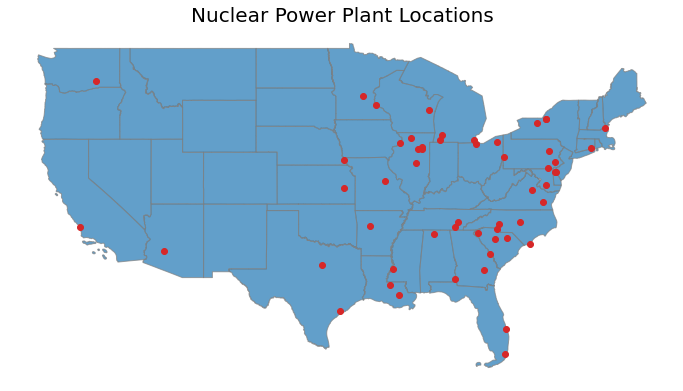

In [9]:
ax = us_contig.plot(edgecolor='grey', color='tab:blue', alpha=0.7)
nuclear_plants.plot(ax=ax,color='tab:red')
ax.set_axis_off()
ax.set_title('Nuclear Power Plant Locations', fontsize=20)
plt.show()

In [12]:
nuclear_plants.Nuclear_MW.min()

581.7

In [13]:
plant_coords = nuclear_plants[['Plant_Name', 'Latitude', 'Longitude']]
plant_coords.head(5)

,Plant_Name,Latitude,Longitude
22,Browns Ferry,34.70420,-87.11890
102,Clinton Power Station,40.17190,-88.83390
103,Wolf Creek Generating Station,38.23926,-95.68978
207,Columbia Generating Station,46.47110,-119.33390
345,Millstone,41.31070,-72.16770


In [65]:
plant_coords.to_csv('nuclear_plant_locations.csv')

In [66]:
plant_coords.sort_values(by='Plant_Name')

,Plant_Name,Latitude,Longitude
2388,Arkansas Nuclear One,35.311000,-93.235100
1719,Beaver Valley,40.621900,-80.433600
1711,Braidwood Generation Station,41.243500,-88.228600
22,Browns Ferry,34.704200,-87.118900
1704,Brunswick Nuclear,33.959700,-78.011400
1712,Byron Generating Station,42.074200,-89.281900
1789,Callaway,38.758919,-91.778841
1701,Calvert Cliffs Nuclear Power Plant,38.434400,-76.441700
1717,Catawba,35.051400,-81.069400
102,Clinton Power Station,40.171900,-88.833900


In [15]:
ot_plants = pd.read_csv('nuclear_plants_OT.csv')
ot_plants.rename(columns={'Plant Name':'Plant_Name',
                          'Plant Code':'Plant_Code'}, inplace=True)

In [16]:
ot_plant_coords = ot_plants.merge(plant_coords, on='Plant_Name')
ot_plant_coords

,Plant_Code,Plant_Name,Latitude,Longitude
0,46.0,Browns Ferry,34.704200,-87.118900
1,204.0,Clinton Power Station,40.171900,-88.833900
2,210.0,Wolf Creek Generating Station,38.239260,-95.689780
3,566.0,Millstone,41.310700,-72.167700
4,621.0,Turkey Point,25.435600,-80.330800
5,869.0,Dresden Generating Station,41.390000,-88.270000
6,880.0,Quad Cities Generating Station,41.726111,-90.310278
7,1922.0,Monticello Nuclear Facility,45.333800,-93.849300
8,1925.0,Prairie Island,44.622000,-92.633300
9,2410.0,PSEG Salem Generating Station,39.462500,-75.535800


In [18]:
ot_plant_coords = nuclear_plants.merge(ot_plants, on=['Plant_Name', 'Plant_Code'])

In [24]:
us_contig.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [25]:
ot_plant_coords.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
ot_plant_coords.to_crs(4269, inplace=True)
ot_plant_coords.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

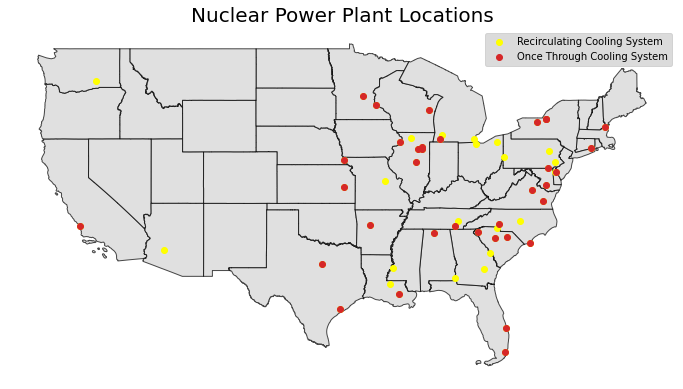

In [45]:
ax = us_contig.plot(edgecolor='k', color='lightgrey', alpha=0.7)
nuclear_plants.plot(ax=ax,color='yellow', label='Recirculating Cooling System')
ot_plant_coords.plot(ax=ax, color='tab:red', label='Once Through Cooling System')
# nuclear_plants[nuclear_plants['StateName']=='Michigan'].plot(ax=ax, color='green')
ax.set_axis_off()
ax.set_title('Nuclear Power Plant Locations', fontsize=20)
ax.legend(facecolor='lightgrey')
plt.show()

In [37]:
ot_plant_coords

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,StateName,Zip,Street_Add,...,tech_desc,Source,Period,Latitude,Longitude,Bio_MW,Geo_MW,Other_MW,Bat_MW,geometry
0,46,Browns Ferry,Tennessee Valley Authority,18642,Electric Utility,Decatur,Limestone,Alabama,35609,Shaw Rd. PO Box 2000,...,Nuclear,"EIA-860, EIA-860M and EIA-923",202108,34.704200,-87.118900,0.0,0.0,0.0,0.0,POINT (-87.11890 34.70420)
1,204,Clinton Power Station,Exelon Nuclear,55951,IPP Non-CHP,Clinton,DeWitt,Illinois,61727,Rt. 54 West,...,Nuclear,"EIA-860, EIA-860M and EIA-923",202108,40.171900,-88.833900,0.0,0.0,0.0,0.0,POINT (-88.83390 40.17190)
2,210,Wolf Creek Generating Station,Wolf Creek Nuclear Optg Corp,20893,Electric Utility,Burlington,Coffey,Kansas,66839,1550 Oxen Lane N.E.,...,Nuclear,"EIA-860, EIA-860M and EIA-923",202108,38.239260,-95.689780,0.0,0.0,0.0,0.0,POINT (-95.68978 38.23926)
3,566,Millstone,Dominion Energy Nuclear Conn Inc,5221,IPP Non-CHP,Waterford,New London,Connecticut,6385,314 Rope Ferry Road,...,Nuclear,"EIA-860, EIA-860M and EIA-923",202108,41.310700,-72.167700,0.0,0.0,0.0,0.0,POINT (-72.16770 41.31070)
4,621,Turkey Point,Florida Power & Light Co,6452,Electric Utility,Homestead,Miami Dade,Florida,33035,9700 SW 344th Street,...,Natural Gas Fired Combined Cycle; Nuclear;,"EIA-860, EIA-860M and EIA-923",202108,25.435600,-80.330800,0.0,0.0,0.0,0.0,POINT (-80.33080 25.43560)
5,869,Dresden Generating Station,Exelon Nuclear,55951,IPP Non-CHP,Morris,Grundy,Illinois,60450,12RR1 Morris,...,Nuclear,"EIA-860, EIA-860M and EIA-923",202108,41.390000,-88.270000,0.0,0.0,0.0,0.0,POINT (-88.27000 41.39000)
6,880,Quad Cities Generating Station,Exelon Nuclear,55951,IPP Non-CHP,Cordova,Rock Island,Illinois,61242,22710 206 Ave N,...,Nuclear,"EIA-860, EIA-860M and EIA-923",202108,41.726111,-90.310278,0.0,0.0,0.0,0.0,POINT (-90.31028 41.72611)
7,1922,Monticello Nuclear Facility,Northern States Power Co - Minnesota,13781,Electric Utility,Monticello,Wright,Minnesota,55362,2807 W. County Rd 75,...,Nuclear,"EIA-860, EIA-860M and EIA-923",202108,45.333800,-93.849300,0.0,0.0,0.0,0.0,POINT (-93.84930 45.33380)
8,1925,Prairie Island,Northern States Power Co - Minnesota,13781,Electric Utility,Welch,Goodhue,Minnesota,55066,1717 Wakonade Dr. East,...,Nuclear,"EIA-860, EIA-860M and EIA-923",202108,44.622000,-92.633300,0.0,0.0,0.0,0.0,POINT (-92.63330 44.62200)
9,2410,PSEG Salem Generating Station,PSEG Nuclear LLC,15478,IPP Non-CHP,Hancocks Bridge,Salem,New Jersey,8038,P O Box 236 End of Buttonwood,...,Nuclear; Petroleum Liquids;,"EIA-860, EIA-860M and EIA-923",202108,39.462500,-75.535800,0.0,0.0,0.0,0.0,POINT (-75.53580 39.46250)
